<h1>Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis</h1>

<h2>Problem Statement </h2>

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [8]:
# Load parquet file
df = pd.read_parquet("yellow_tripdata_2020-01.parquet")


df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


In [9]:
df.shape

(6405008, 19)

In [10]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [11]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [12]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [13]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1,6.00,1.20,4.800000
1,1.0,1,7.00,1.20,7.416667
2,1.0,1,6.00,0.60,6.183333
3,1.0,1,5.50,0.80,4.850000
4,1.0,2,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,0,52.18,12.07,26.000000
6405004,NaN,0,54.01,23.48,44.000000
6405005,NaN,0,38.02,12.09,25.000000
6405006,NaN,0,28.74,11.65,24.266667


In [14]:
df.isnull().sum()

passenger_count    65441
payment_type           0
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [15]:
(65441/len(df))*100

1.021716132126611

In [16]:
df.dropna(inplace=True)

In [18]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1,6.0,1.20,4.800000
1,1.0,1,7.0,1.20,7.416667
2,1.0,1,6.0,0.60,6.183333
3,1.0,1,5.5,0.80,4.850000
4,1.0,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1,11.0,2.10,14.233333
6339563,1.0,1,13.0,2.13,19.000000
6339564,1.0,1,12.5,2.55,16.283333
6339565,1.0,2,8.5,1.61,9.633333


In [19]:
df['passenger_count'] = df['passenger_count'].astype('int64')

In [20]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [21]:
df.drop_duplicates(inplace =True)

In [22]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [23]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [32]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]


In [36]:
df.shape

(2780283, 5)

In [37]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [39]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [40]:
df = df[
    (df['fare_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['duration'] > 0) 
]

{'whiskers': [<matplotlib.lines.Line2D at 0x19061cef2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x19061cef8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19061cef020>],
 'medians': [<matplotlib.lines.Line2D at 0x19061cefec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19000210230>],
 'means': []}

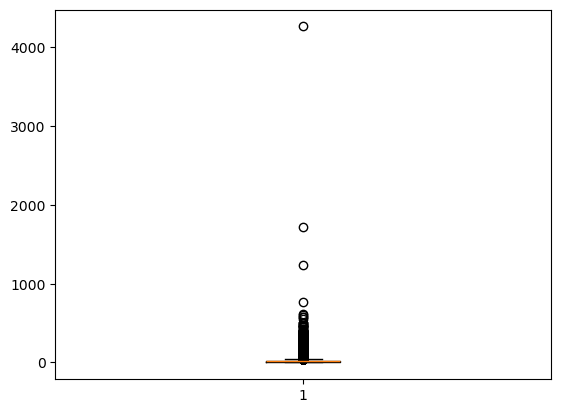

In [41]:
plt.boxplot(df['fare_amount'])

In [48]:
for col in ['fare_amount','trip_distance','duration']:
    q1= df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR= q3 - q1


    lower_bound =  q1- 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    # Filter out outliers
    df = df[
        (df[col] >= lower_bound) & 
        (df[col] <= upper_bound)
    ]




In [55]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


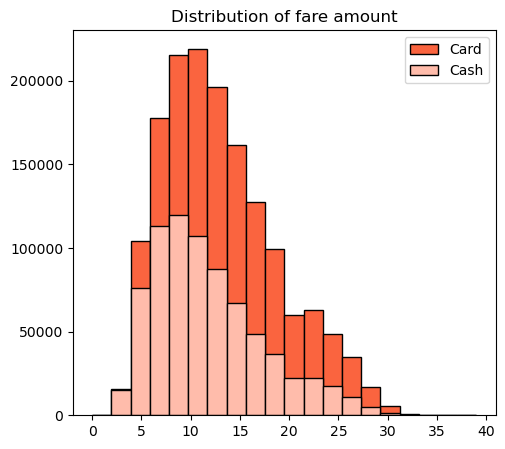

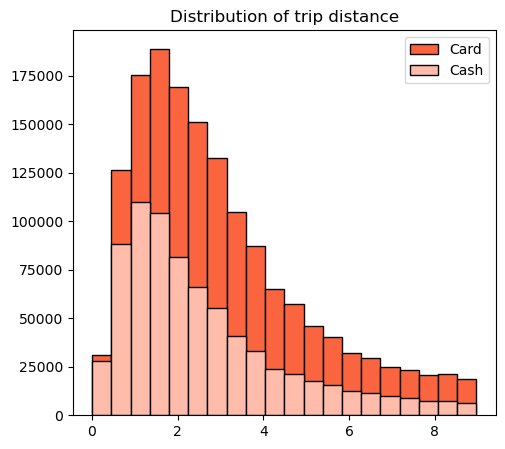

In [306]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card'] ['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color ='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash'] ['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color ='#FFBCAB',label='Cash')
plt.legend()
plt.show()


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card'] ['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color ='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash'] ['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color ='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [308]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

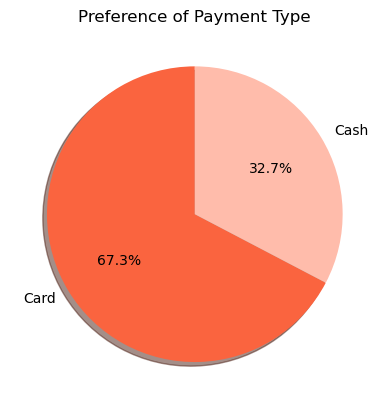

In [309]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
       startangle=90,shadow=True,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [310]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [313]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [317]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [319]:
newdf=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
newdf['payment_type']=['Card','Cash']
newdf.iloc[0,1:]=passenger_count.iloc[0:5,-1]
newdf.iloc[1,1:]=passenger_count.iloc[5:,-1]
newdf

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


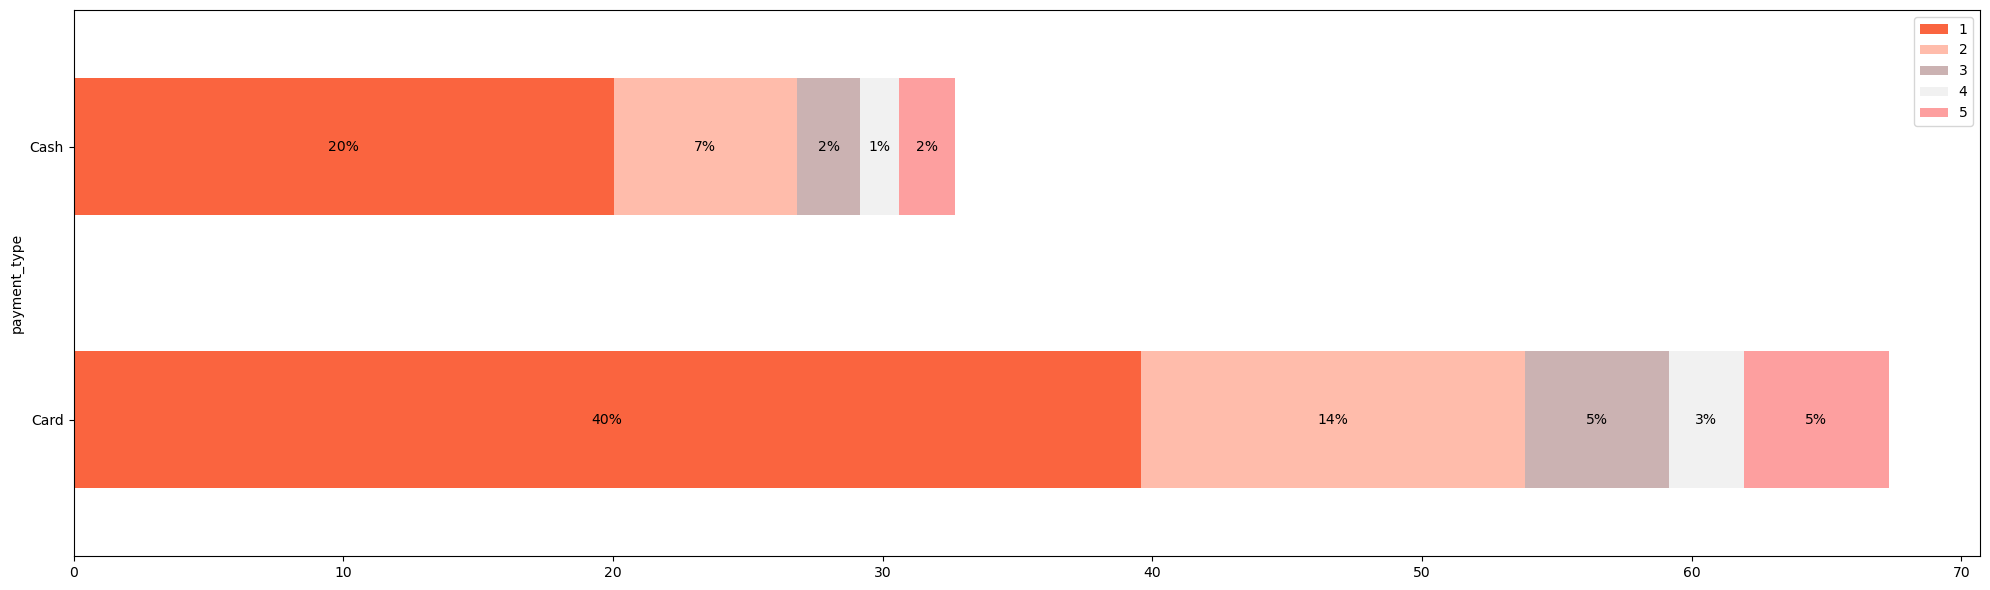

In [321]:
fig, ax = plt.subplots(figsize=(20,6))


newdf.plot(x='payment_type', kind='barh', stacked=True, 
        color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'], ax=ax)

for p in ax.patches:
    width = p.get_width()
    if width > 0:  
        height = p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2,
                y + height / 2,
                '{:.0f}%'.format(width),
                ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


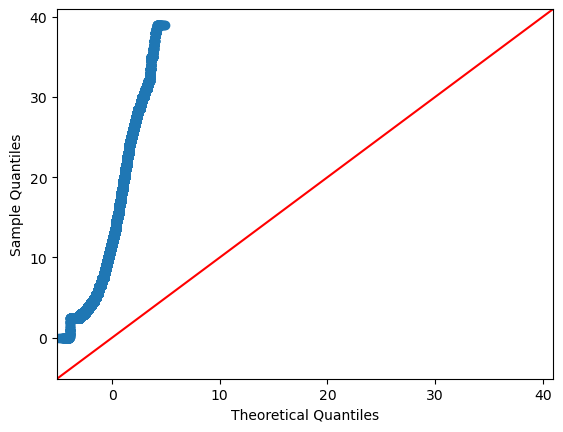

In [327]:
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [333]:
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']


In [337]:
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T statistic',t_stats,'p_value',p_value)

T statistic 169.2111527245052 p_value 0.0
